In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# Set image size and batch size
img_height, img_width = 32, 32
batch_size = 20

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size=(img_height, img_width),
    batch_size=batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size=(img_height, img_width),
    batch_size=batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size=(img_height, img_width),
    batch_size=batch_size
)




Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


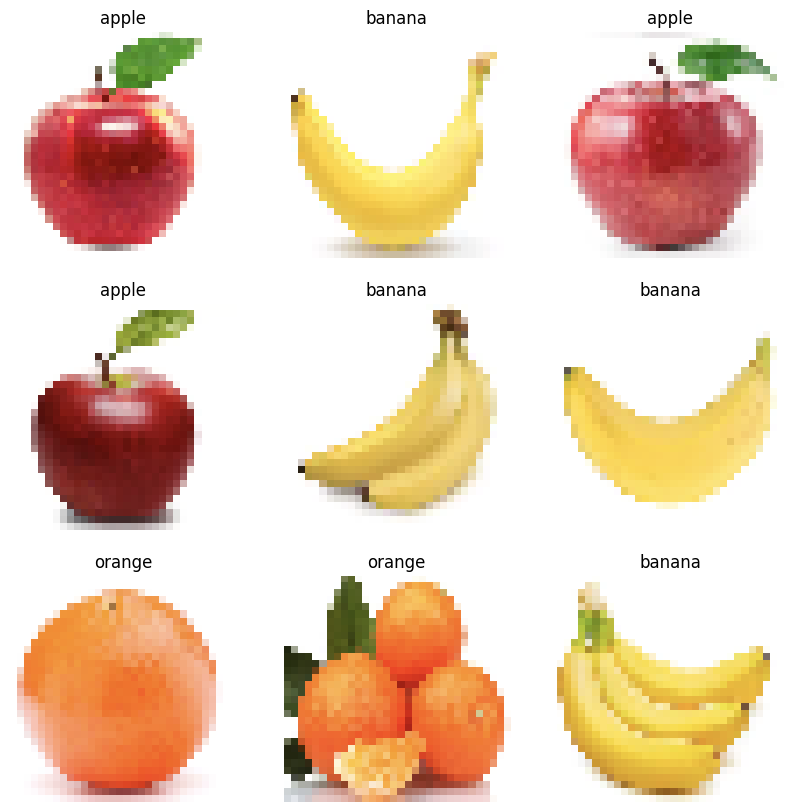

In [3]:
# Class names
class_names = train_ds.class_names

# Display sample images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [4]:

# Load the MobileNetV2 model, pretrained on ImageNet
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    input_shape=(img_height, img_width, 3),
    include_top=False
)

# Freeze the base model
base_model.trainable = False


C:\Users\knigh\AppData\Local\Temp\ipykernel_31396\1739406639.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


In [5]:

# Define the new model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names))  # Output layer for number of classes
])


In [6]:

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [7]:

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.4088 - loss: 1.0822 - val_accuracy: 0.3939 - val_loss: 1.0846
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5205 - loss: 1.0218 - val_accuracy: 0.3939 - val_loss: 1.0768
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5540 - loss: 0.9750 - val_accuracy: 0.3788 - val_loss: 1.0767
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5297 - loss: 0.9618 - val_accuracy: 0.3788 - val_loss: 1.0824
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5545 - loss: 0.9306 - val_accuracy: 0.3939 - val_loss: 1.0881
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5735 - loss: 0.9048 - val_accuracy: 0.3939 - val_loss: 1.0922
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5766 - loss: 0.8973 - val_accuracy: 0.4242 - val_loss: 1.0923
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5621 - loss: 0.9017 - val_accuracy: 0.4242 - v

In [8]:

# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds, verbose=0)
print(f'TensorFlow Model Accuracy: {test_acc:.4f}')


TensorFlow Model Accuracy: 0.5769


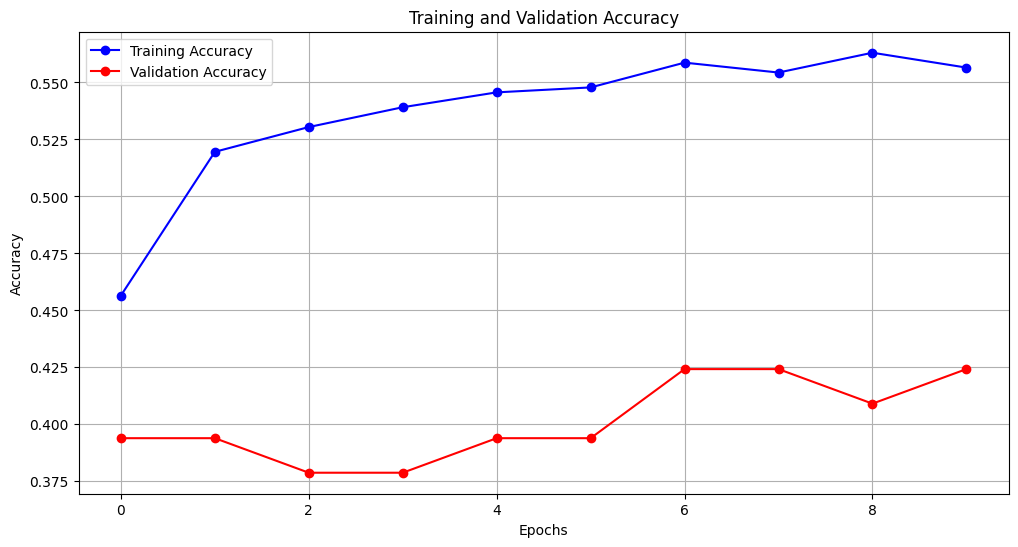

In [9]:

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [12]:

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open("model_mobilenetv2.tflite", 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\knigh\AppData\Local\Temp\tmp7wjddlvc\assets


INFO:tensorflow:Assets written to: C:\Users\knigh\AppData\Local\Temp\tmp7wjddlvc\assets


Saved artifact at 'C:\Users\knigh\AppData\Local\Temp\tmp7wjddlvc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor_472')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2189925247376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189925246416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189925251216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189925246608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189925247568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189925245264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189925244496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189925244112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189925244688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2189925246032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  218

In [27]:
def evaluate_tflite_model(interpreter, test_ds, class_names):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    print(f"Input details: {input_details}")
    print(f"Output details: {output_details}")

    correct_predictions = 0
    total_predictions = 0

    for images, labels in test_ds:
        # Prepare the input data
        input_data = np.array(images, dtype=np.float32)

        # Get the expected input shape from the model
        input_shape = input_details[0]['shape']
        print(f"Expected input shape: {input_shape}")
        print(f"Input data shape: {input_data.shape}")

        # Check if input_data needs reshaping
        if input_data.shape[1:] != tuple(input_shape[1:]):
            # Resize the input data to match the expected input shape
            if input_shape[0] == 1:  # Model expects single image at a time
                input_data = np.reshape(input_data, (1, *input_shape[1:]))
            else:
                input_data = np.reshape(input_data, (input_shape[0], *input_shape[1:]))

        # Set the tensor
        try:
            interpreter.set_tensor(input_details[0]['index'], input_data)
        except ValueError as e:
            print(f"Error: {e}")
            print(f"Input data shape: {input_data.shape}")
            print(f"Expected shape: {input_shape}")
            return None

        interpreter.invoke()

        # Get the output data
        output_data = interpreter.get_tensor(output_details[0]['index'])

        # Convert logits to probabilities
        predictions = tf.nn.softmax(output_data).numpy()

        # Calculate accuracy
        predicted_classes = np.argmax(predictions, axis=1)
        correct_predictions += np.sum(predicted_classes == labels.numpy())
        total_predictions += len(labels)

    accuracy = correct_predictions / total_predictions
    return accuracy

# Load the TensorFlow Lite model and evaluate it
interpreter = tf.lite.Interpreter(model_path="model_mobilenetv2.tflite")
interpreter.allocate_tensors()

# Ensure test_ds and class_names are defined
tflite_accuracy = evaluate_tflite_model(interpreter, test_ds, class_names)
if tflite_accuracy is not None:
    print(f'TensorFlow Lite Model Accuracy: {tflite_accuracy:.4f}')


Input details: [{'name': 'serving_default_keras_tensor_472:0', 'index': 0, 'shape': array([ 1, 32, 32,  3]), 'shape_signature': array([-1, 32, 32,  3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall_1:0', 'index': 177, 'shape': array([1, 3]), 'shape_signature': array([-1,  3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Expected input shape: [ 1 32 32  3]
Input data shape: (20, 32, 32, 3)
Error: Cannot set tensor: Dimension mismatch. Got 20 but expected 1 for dimension 0 of input 0.
Input data shape: (20, 32, 32, 3)
Expected shape: [ 1 32 32  3]


In [29]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Define a function to get model predictions and true labels
def get_predictions_and_labels(model, dataset):
    all_labels = []
    all_predictions = []

    for images, labels in dataset:
        # Make predictions
        predictions = model(images, training=False)
        predicted_classes = np.argmax(predictions.numpy(), axis=1)

        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted_classes)
    
    return np.array(all_labels), np.array(all_predictions)

# Get predictions and labels from the test dataset
test_labels, test_predictions = get_predictions_and_labels(model, test_ds)


In [30]:

# Compute precision, recall, and F1 score
precision = precision_score(test_labels, test_predictions, average='weighted')
recall = recall_score(test_labels, test_predictions, average='weighted')
f1 = f1_score(test_labels, test_predictions, average='weighted')




In [31]:

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')



Precision: 0.3861
Recall: 0.5538
F1 Score: 0.4550


In [32]:
# Optional: Print a full classification report
report = classification_report(test_labels, test_predictions, target_names=class_names)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

       apple       0.49      0.70      0.58        47
      banana       0.63      0.91      0.74        43
      orange       0.00      0.00      0.00        40

    accuracy                           0.55       130
   macro avg       0.37      0.54      0.44       130
weighted avg       0.39      0.55      0.46       130



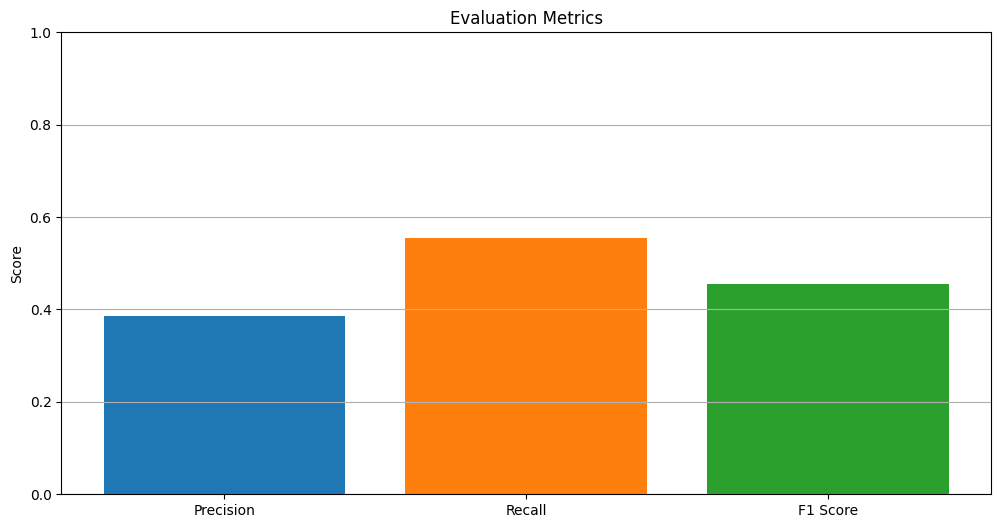

In [33]:

# Plot metrics (precision, recall, and F1 score) with different colors
plt.figure(figsize=(12, 6))

metrics = [precision, recall, f1]
metrics_names = ['Precision', 'Recall', 'F1 Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Different colors for each metric

plt.bar(metrics_names, metrics, color=colors)
plt.title('Evaluation Metrics')
plt.ylabel('Score')
plt.ylim([0, 1])
plt.grid(axis='y')
plt.show()